Ссылка на датасет - https://www.kaggle.com/datasets/arsalanjamal002/student-sleep-patterns



*   Student_ID: уникальный идентификатор для каждого студента (целое число)
*   Age: возраст студента в годах (целое число).
*   Gender: пол студента (категориальный: «мужской», «женский», «другой»).
* University_Year: текущий курс обучения студента (категориальный: «1-й курс», «2-й курс», «3-й курс», «4-й курс»).
* Sleep_Duration: общее количество часов сна за ночь (с плавающей точкой).
* Study_Hours: среднее количество часов, затрачиваемых на занятия в день (с плавающей точкой).
* Screen_Time: среднее количество часов, затрачиваемых на экраны (за исключением занятий) в день (с плавающей точкой).
* Caffeine_Intake: среднее количество потребляемых в день напитков с кофеином (целое число).
* Physical_Activity: среднее количество минут, затрачиваемых на физическую активность в день (целое число).
* Sleep_Quality: субъективная оценка качества сна по шкале от 1 до 10 (1 — наихудший вариант, 10 — наилучший) (целое число).
* Weekday_Sleep_Start: время, в которое учащийся обычно ложится спать в будние дни (число с плавающей точкой, в 24-часовом формате, например, 23:00 — это 23:00).
* Weekend_Sleep_Start: время, в которое учащийся обычно ложится спать в выходные (число с плавающей точкой, в 24-часовом формате).
* Weekday_Sleep_End: время, в которое учащийся обычно просыпается в будние дни (плавающее значение в 24-часовом формате).
* Weekend_Sleep_End: время, в которое студент обычно просыпается по выходным (плавающее значение в 24-часовом формате).

In [57]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
df=pd.read_csv('/content/drive/MyDrive/student_sleep_patterns.csv')

# **АНАЛИЗ ДАННЫХ**

In [60]:
df.shape # 500 записей, 14 столбцов

(500, 14)

In [61]:
df.head(10) # первые 10 строк

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
5,6,25,Other,1st Year,4.9,12.0,3.2,3,96,9,9.80,18.83,5.04,10.51
6,7,22,Female,2nd Year,6.5,11.7,3.4,1,99,6,13.05,20.96,8.58,10.81
7,8,22,Male,2nd Year,6.1,7.8,3.0,1,108,4,10.49,10.85,5.60,10.02
8,9,24,Female,1st Year,8.6,2.4,1.4,1,86,7,11.06,18.88,8.14,8.78
9,10,19,Other,2nd Year,5.8,8.2,2.0,3,44,8,14.65,5.31,7.47,9.37


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


In [63]:
df.describe()

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,21.53600,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,21.930000,22.000000,8.980000,10.990000


In [64]:
df['Gender'].unique()

array(['Other', 'Male', 'Female'], dtype=object)

In [65]:
df['Gender'].value_counts()

,count
Gender,
Male,186
Female,166
Other,148


# **ВИЗУАЛИЗАЦИЯ**

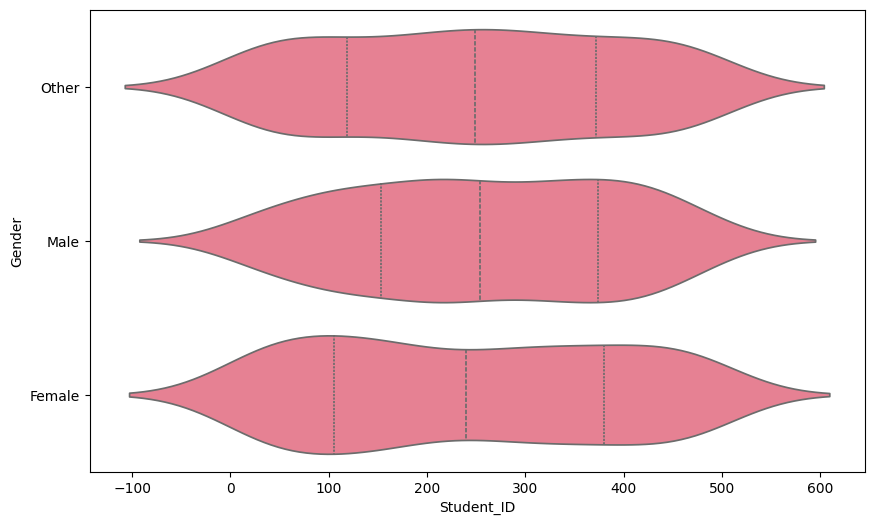

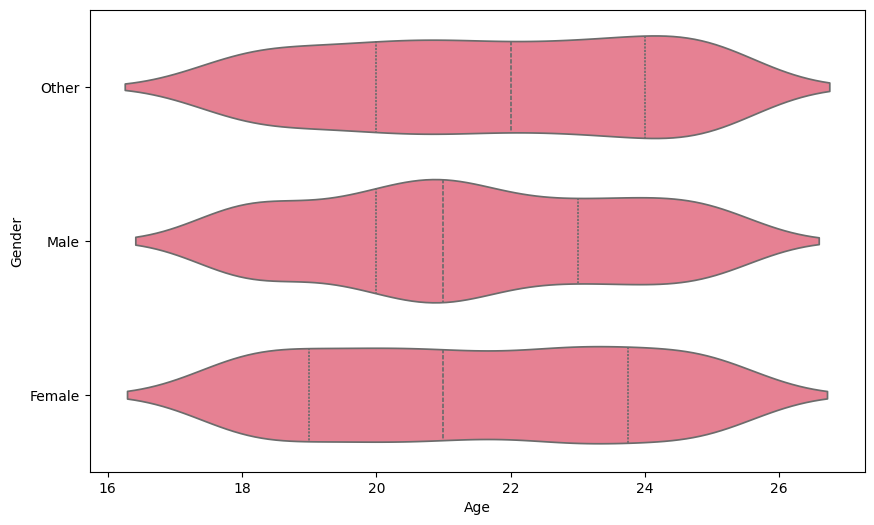

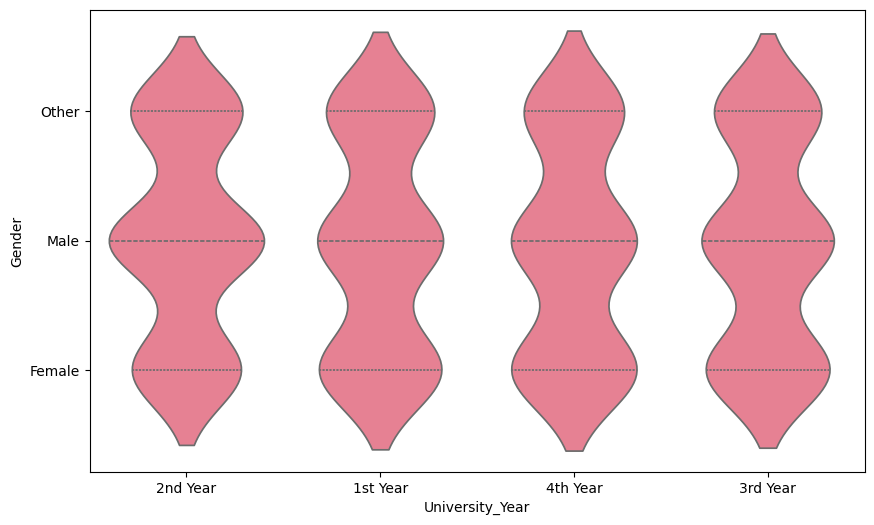

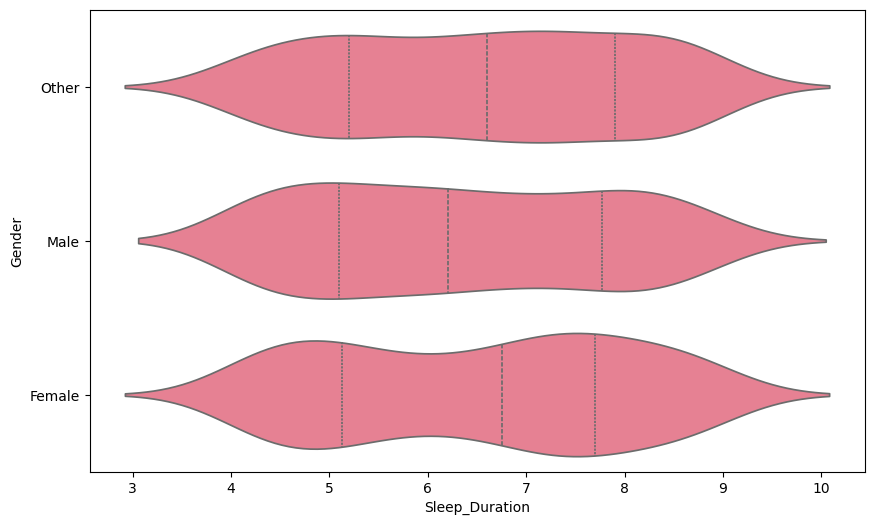

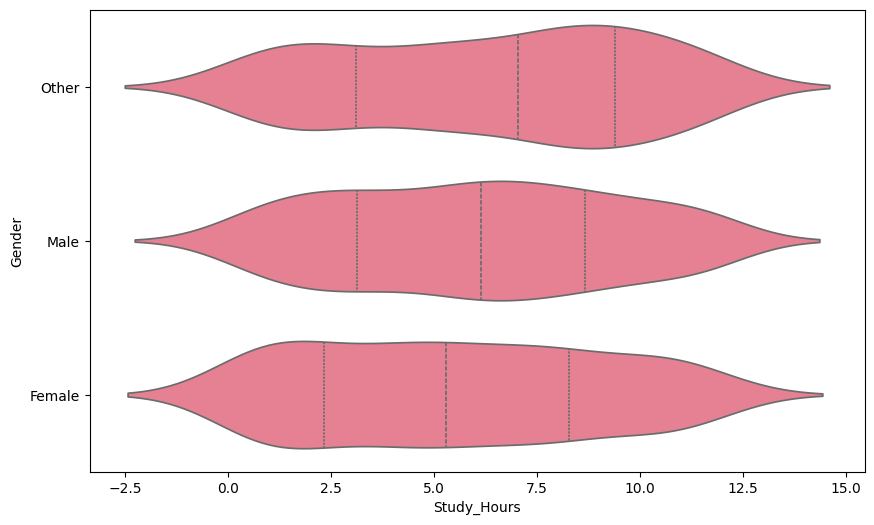

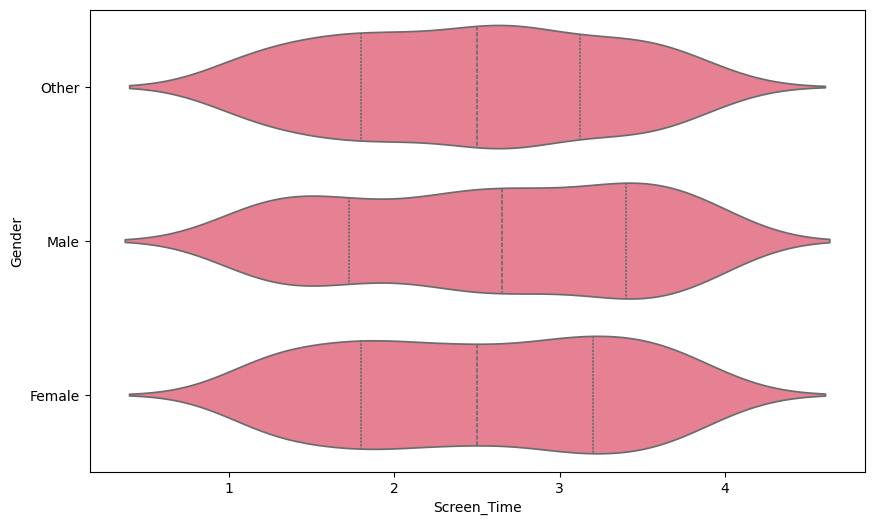

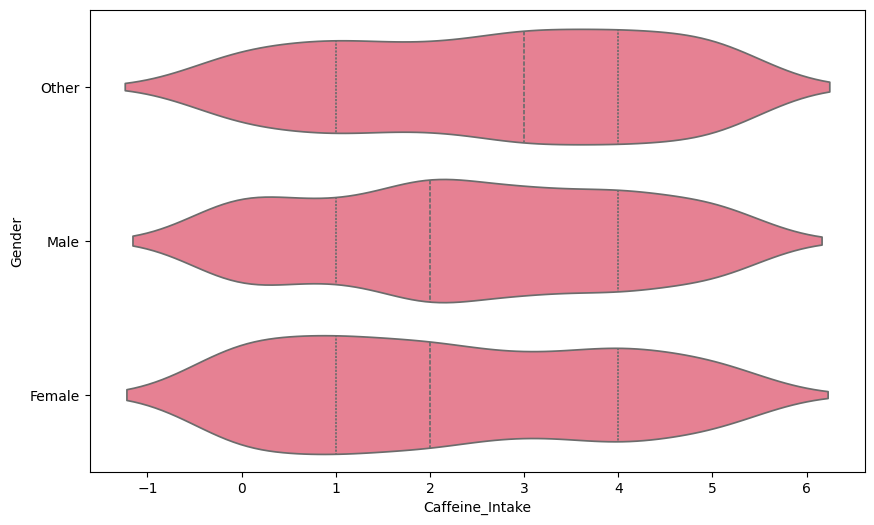

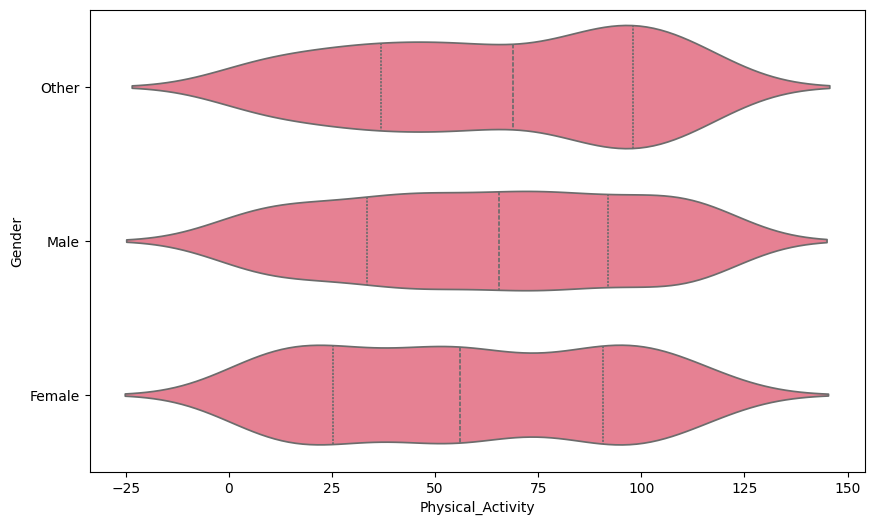

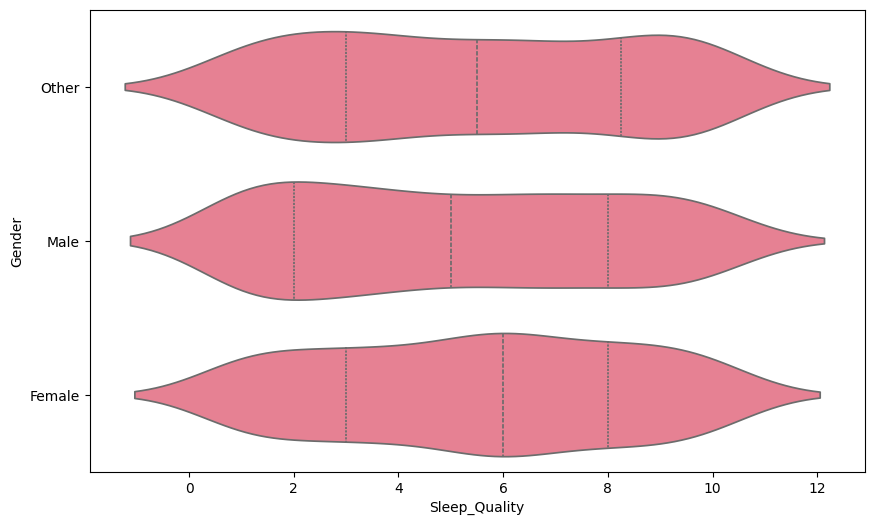

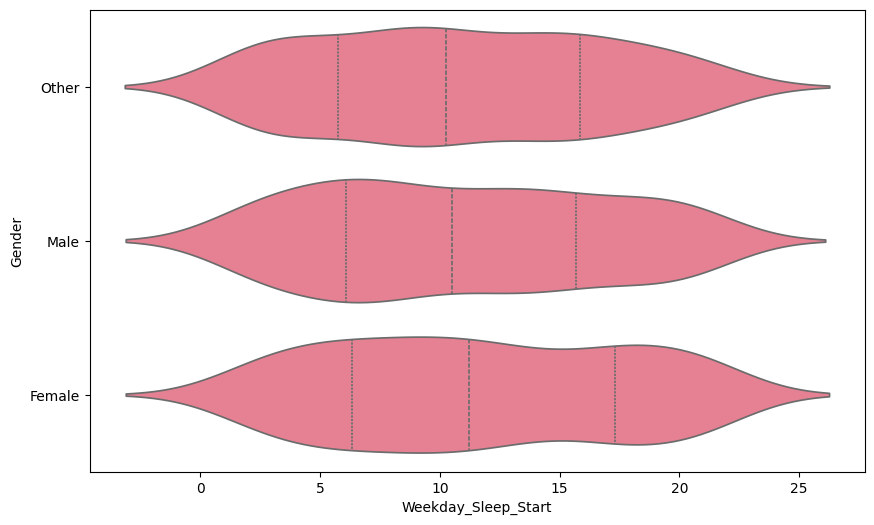

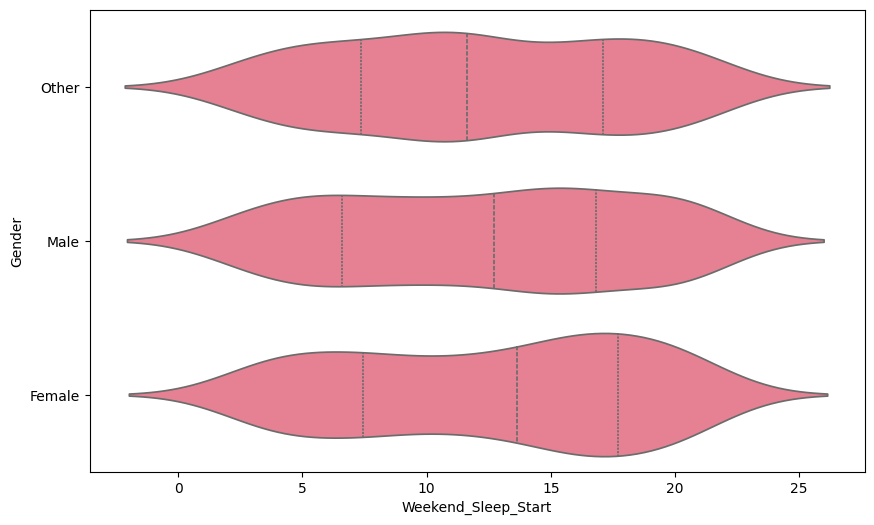

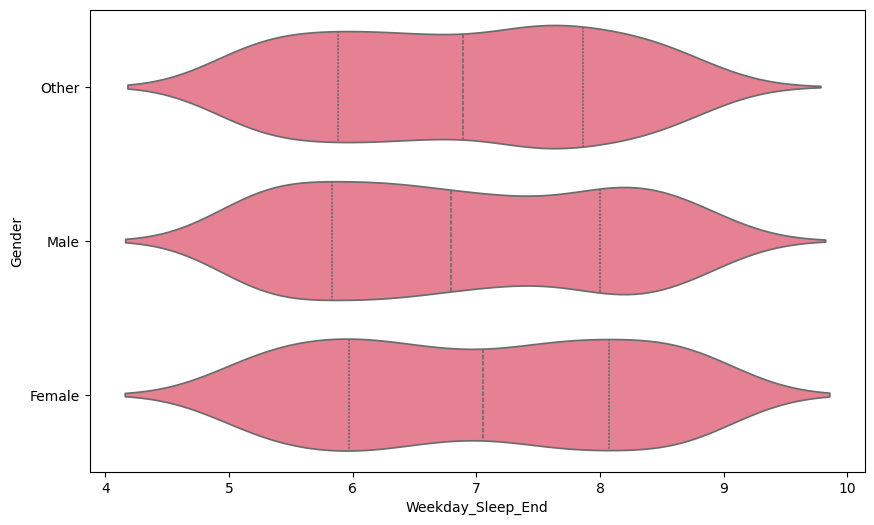

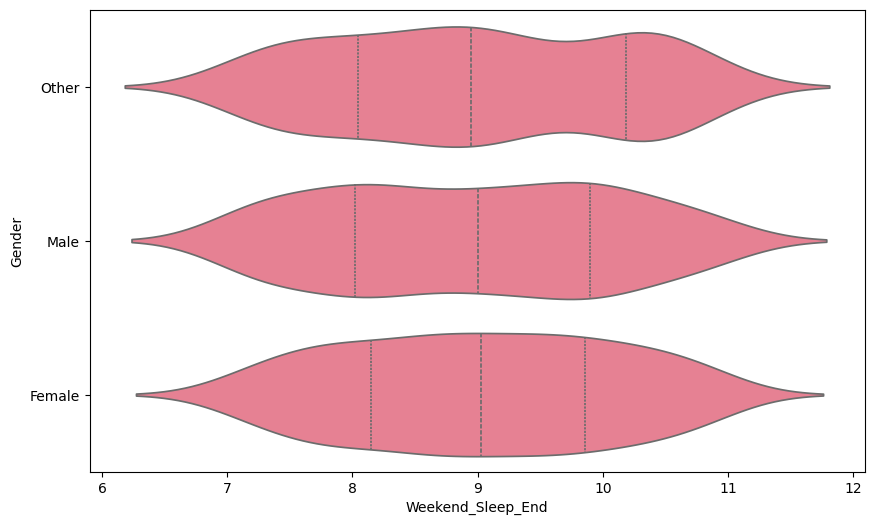

In [66]:
# Скрипичный график
features = df.columns.drop('Gender')
for feature in features:
  plt.figure(figsize=(10,6))
  sns.violinplot(y='Gender', x=feature, data=df, inner='quartile')
  plt.show()

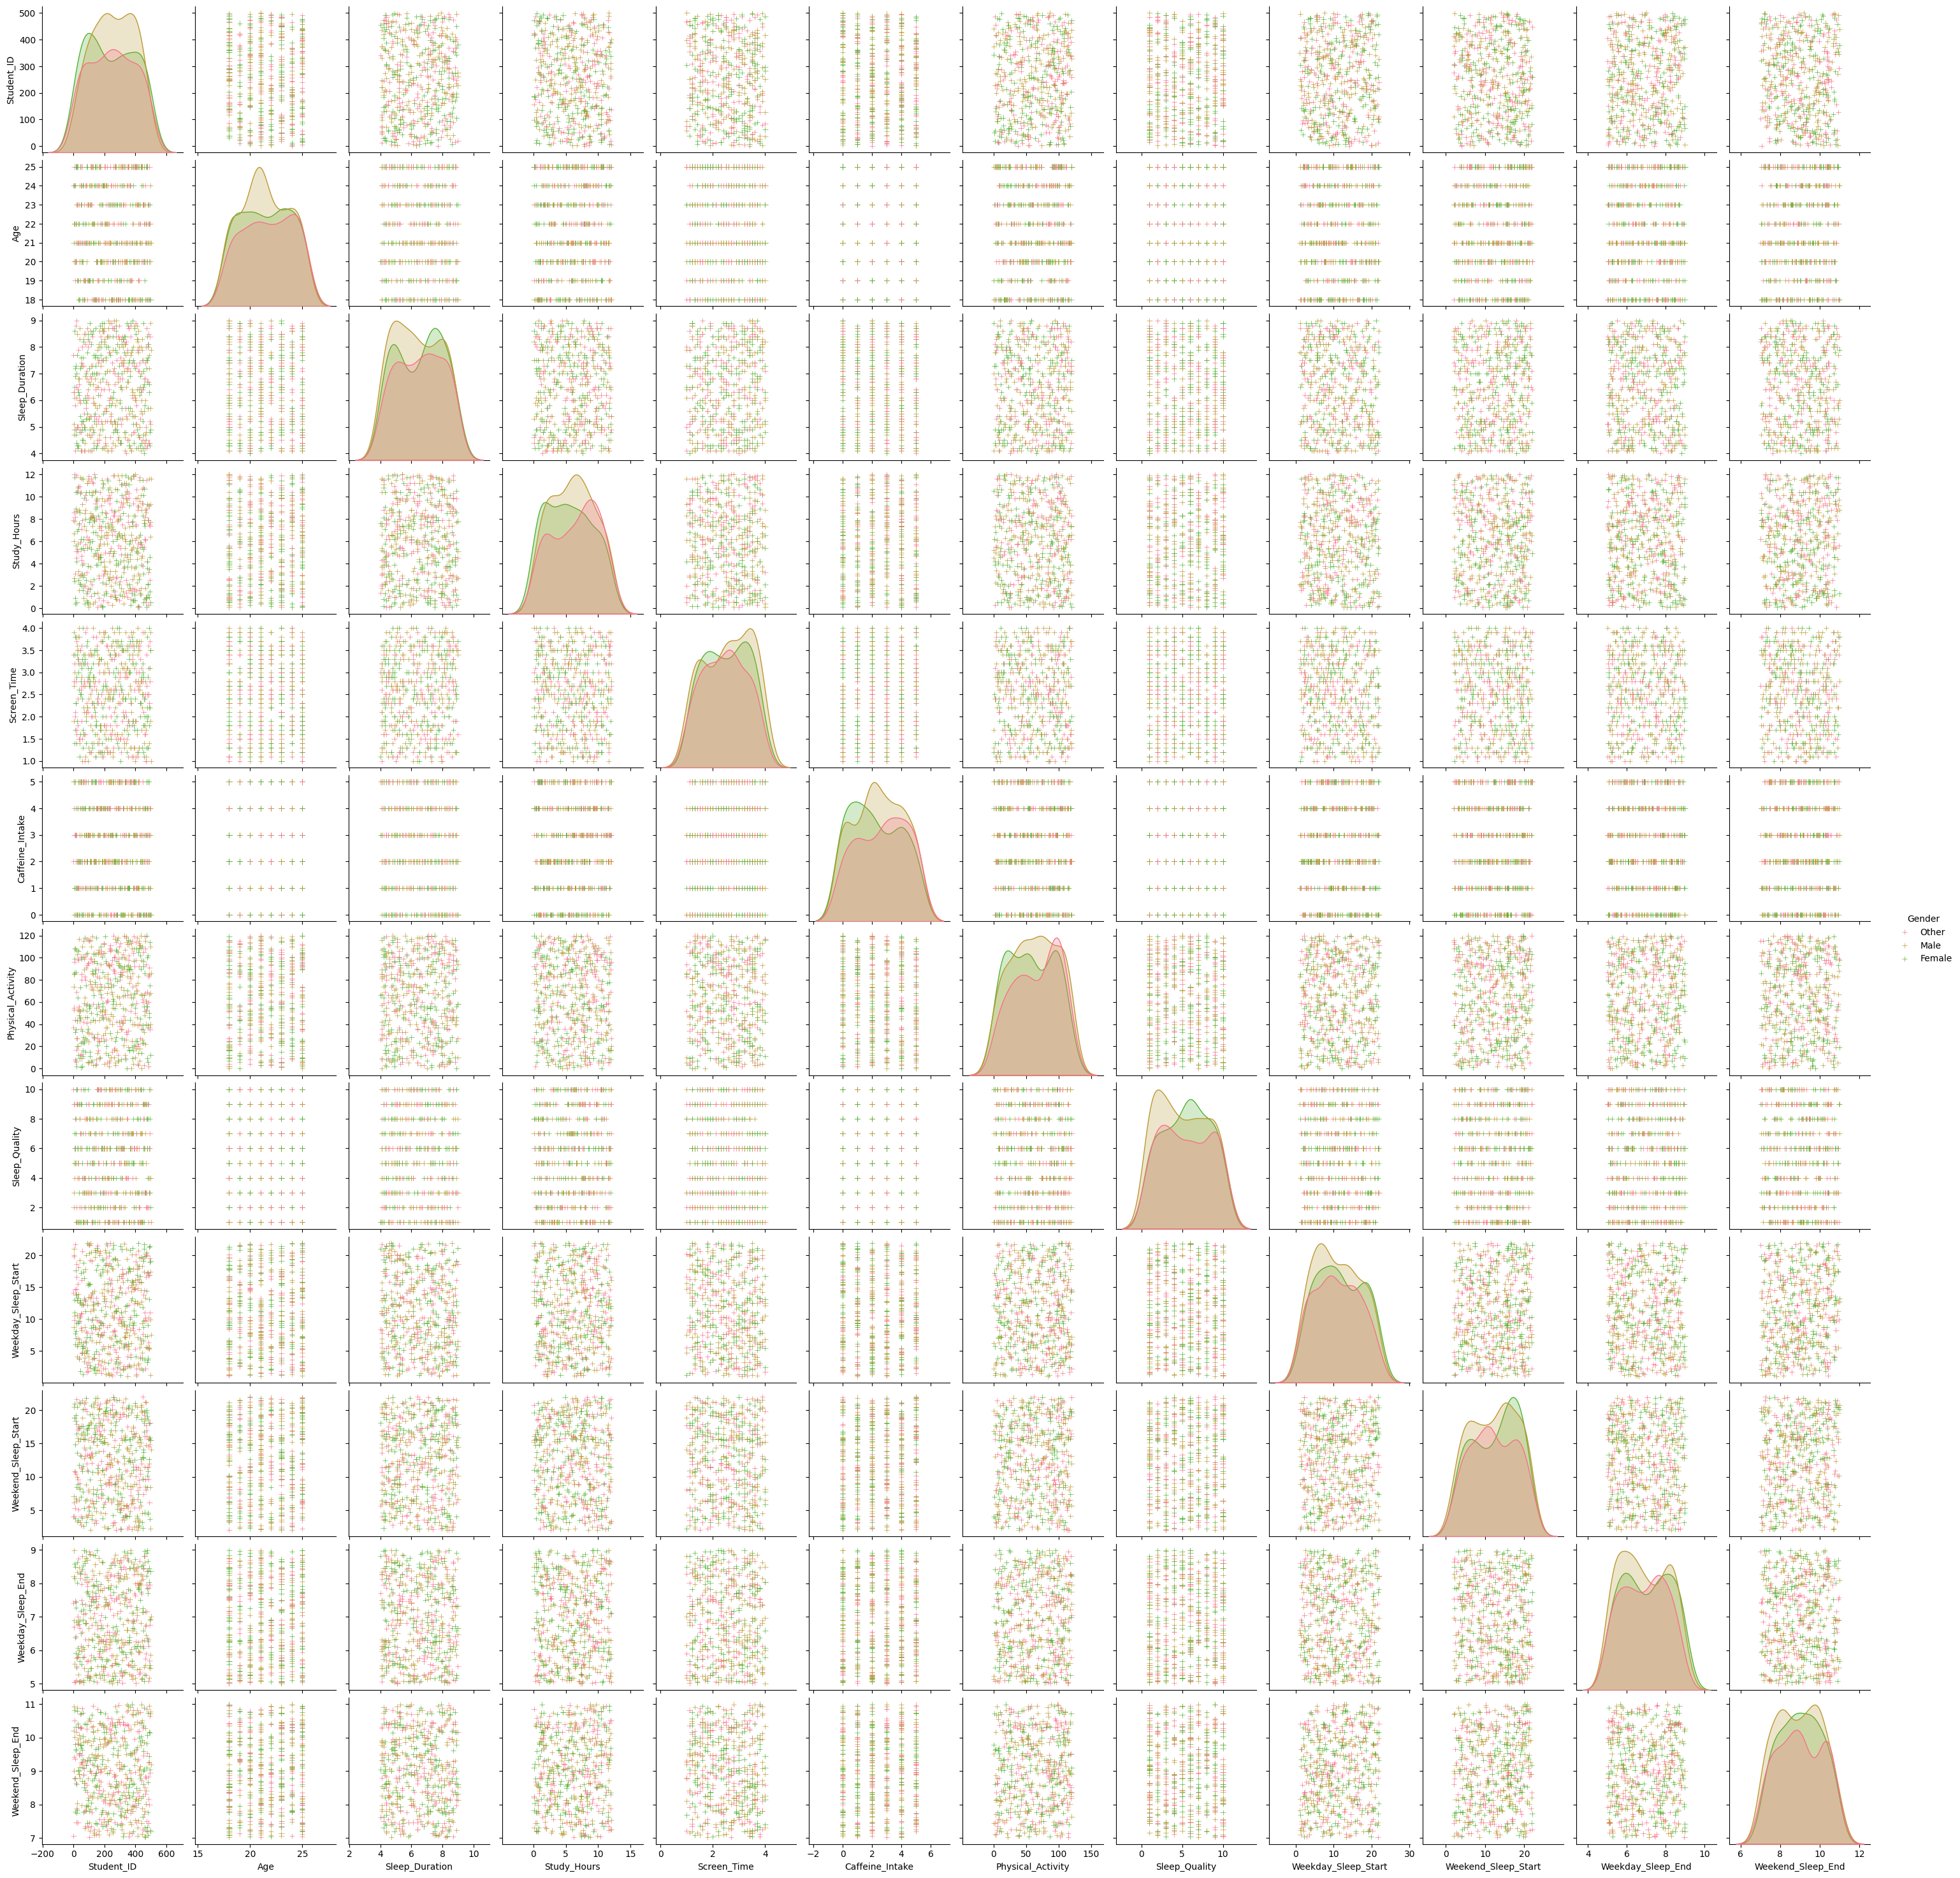

In [67]:
# Парный график
sns.pairplot(df, hue='Gender', markers='+')
plt.show()

In [68]:
from sklearn.preprocessing import OrdinalEncoder # метки в числа

encoder = OrdinalEncoder()
df[['Gender']] = encoder.fit_transform(df[['Gender']])
df[['University_Year']] = encoder.fit_transform(df[['University_Year']])
df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,2.0,1.0,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,1.0,0.0,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,1.0,3.0,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,2.0,3.0,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,1.0,3.0,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


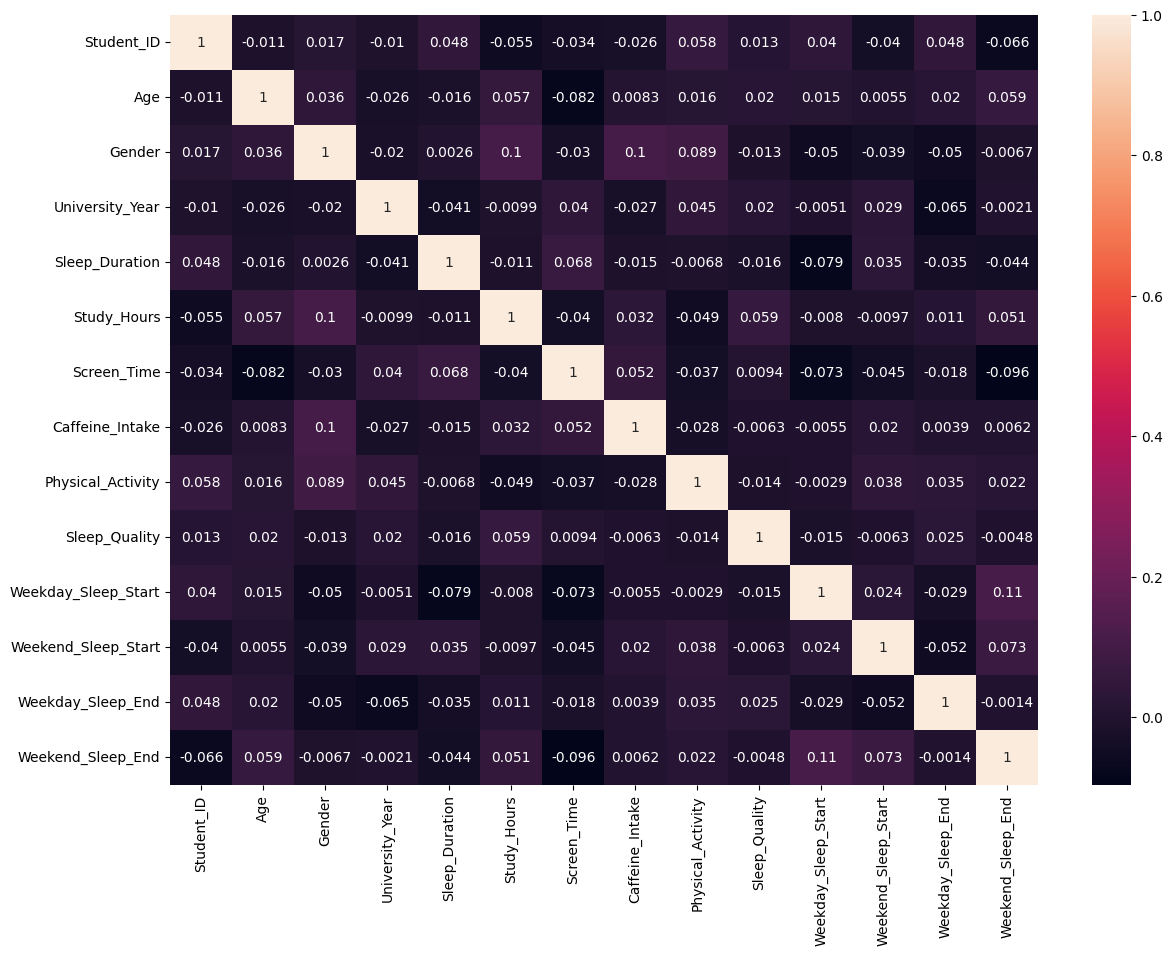

In [69]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.show()

# **ПОСТРОЕНИЕ МОДЕЛИ**

In [70]:
X = df.drop(['Gender'], axis=1)
y = df['Gender']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# ОБУЧЕНИЕ И ВЫБОР ОПТИМАЛЬНОЙ МОДЕЛИ

In [72]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.390000 (0.064420)
LDA: 0.387500 (0.061492)
KNN: 0.347500 (0.067500)
CART: 0.330000 (0.062048)
NB: 0.362500 (0.105030)
SVC: 0.390000 (0.012247)


Будем работать с SVC так как она имеет высокую точность и наименьшее стандартное отклонение

# ОБУЧЕНИЕ КОНКРЕТНОЙ МОДЕЛИ

In [73]:
# Обучение модели SVC на обучающем наборе
svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Отчет о классификации
print(classification_report(y_test, y_pred))

Accuracy: 0.3000
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        38
         1.0       0.30      1.00      0.46        30
         2.0       0.00      0.00      0.00        32

    accuracy                           0.30       100
   macro avg       0.10      0.33      0.15       100
weighted avg       0.09      0.30      0.14       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **ВИЗУАЛИЗАЦИЯ РЕШЕНИЯ**

<Axes: title={'center': 'svc surface with original features'}>

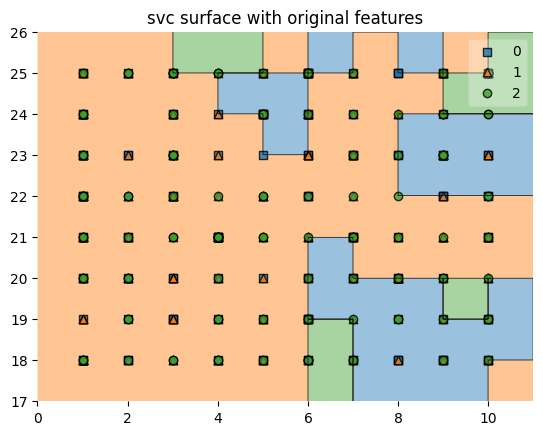

In [74]:
from mlxtend.plotting import plot_decision_regions
y_s = y_train
X_2d= X_train[['Sleep_Quality', 'Age']].values
y_2d = y_s.values.astype(int)

svc_model = SVC(gamma='auto')
svc_model.fit(X_2d, y_2d)

plt.title('svc surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=svc_model)